# Multinomial Logistic Regression Forecasting Model

### Steps:
1. **Dataset Information Gathering**
   - Explore the dataset and understand the available features.
   - Identify potential target and predictor variables for the model.
   - Check for missing values, data types, and overall structure.

2. **Data Cleaning**
     - Handle missing values
     - Encode categorical variables into numeric format where necessary (e.g., gender, race).
     - Normalize or scale features if required.

3. **Data Visualization**
   - Visualize relationships between predictors and the target variable.
   - Use histograms, box plots, and scatter plots to understand distributions.
   - Correlation heatmaps to check for multi collinearity.

4. **TensorFlow Model Training**
   - **Multinomial Logistic Regression Forecasting Model**:
     - Split the data into training and testing sets.
     - Build and compile a neural network model for multinomial logistic regression using TensorFlow.
     - Train the model on the training set.
5. **Evaluation and Scoring**
   - Evaluate the model on the test set and visualize the results.
       
   
### Goal
The objective of this project is to develop a Multinomial Logistic Regression model that predicts a person's vision status (Normal Vision, Visual Impairment, Blindness) based on demographic and health-related factors

**Example**:
#### **Input:**
| Age  | Gender | RiskFactor (Diabetes) | RiskFactor (Smoking) | RiskFactorResponse (Hypertension) |
|------|--------|-----------------------|----------------------|-----------------------------------|
| 50   | Male   | Yes                   | No                   | Yes                               |

#### **Output (Vision Status Prediction)**:
| Vision Status | Probability   |
|---------------|---------------|
| Normal vision | 0.60          |
| Visual impairment | 0.25      |
| Blindness     | 0.15          |


In [291]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

df = pd.read_csv("data/National_Health_and_Nutrition_Examination_Survey_Vision_and_Eye_Health_Surveillance.csv", low_memory=True)

### Dataset Information

In [292]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_limit,High_Confidence_Limit,Numerator,Sample_Size,LocationID,DataValueTypeID,GeoLocation,Geographic Level
count,10320.000000,10320.0,6328.000000,6328.000000,6328.000000,0.0,8639.000000,10320.0,0.0,0.0,0.0
mean,2001.162791,2008.0,23.670702,20.277276,27.117668,NaN,1236.882278,59.0,NaN,NaN,NaN
std,2.880952,0.0,31.245569,30.055377,32.022886,NaN,2400.059894,0.0,NaN,NaN,NaN
min,1999.000000,2008.0,0.000000,0.000000,0.000000,NaN,30.000000,59.0,NaN,NaN,NaN
25%,1999.000000,2008.0,3.400000,2.200000,4.800000,NaN,155.000000,59.0,NaN,NaN,NaN
50%,1999.000000,2008.0,10.800000,7.700000,14.100000,NaN,453.000000,59.0,NaN,NaN,NaN
75%,2005.000000,2008.0,25.000000,17.700000,33.100000,NaN,1265.500000,59.0,NaN,NaN,NaN
max,2005.000000,2008.0,100.000000,99.300000,100.000000,NaN,35090.000000,59.0,NaN,NaN,NaN


### List of all Rows and there DataType

### List of First 5 Rows

In [293]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,QuestionID,ResponseID,DataValueTypeID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID,GeoLocation,Geographic Level
0,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,ALLRACE,RFDM,RFNO,NaN,NaN
1,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,...,QVISA,RVIMP,NaN,AGE4064,GALL,OTH,RFSM,RFYES,NaN,NaN
2,1999,2008,US,National,NHANES,Visual Function,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,...,QVISA,RVUSB,NaN,AGE1217,GM,OTH,RFDM,RFNO,NaN,NaN
3,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,All ages,...,NHBL,RYES,NaN,AGEALL,GF,OTH,RFDM,RFYES,NaN,NaN
4,2005,2008,US,National,NHANES,Visual Function,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,...,NHBL,RYES,NaN,AGE1839,GF,BLK,RFDM,RFNO,NaN,NaN


### Percentage of Values that are Null

In [294]:
round(df.isnull().sum().sum() / df.count().sum(), 3)

0.222

### Check for Duplicate values

In [295]:
df.duplicated().sum()

0

### Data Cleaning 

**Rows to remove for Multinomial Logistic Regression to predicting vision status**
- YearStart
- YearEnd
- LocationDesc
- DataSource
- TopicType
- Data_Value_Unit
- DataValueTypeID
- Data_Value_Alt
- GeoLocation
- LowConfidenceLimit
- HighConfidenceLimit
- Sample_Size
- Data_Value_Footnote_Symbol
- Data_Value_Footnote
- ResponseID
- QuestionID
- StratificationID


In [296]:
df.drop(columns=['YearStart', 'YearEnd', 'LocationDesc', 'DataSource', 'Topic', 
                 'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'GeoLocation', 
                 'Low_Confidence_limit', 'High_Confidence_Limit',  
                 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'ResponseID',
                 'QuestionID', 'LocationAbbr', 'Numerator', 'LocationID', 'RiskFactorID', 'RiskFactorResponseID',  'Geographic Level',
                 'Data_Value','TopicID','CategoryID','AgeID','GenderID', 'RaceEthnicityID'
                 ], inplace=True)

df.dropna(subset=['Sample_Size'], inplace=True)
df['Sample_Size'] = df['Sample_Size'].astype(int)
df.drop(df[df['Age'] == 'All ages'].index, inplace=True)

### Remove all rows that are not related to Vision

In [297]:
vision_cat = ['Blind or Difficulty Seeing', 'Measured Visual Acuity']

df.drop(df[~df['Category'].isin(vision_cat)].index, inplace=True)

### Save Cleaned Data

In [298]:
df.to_csv(r'data/Vision_Survey_Cleaned.csv', header=True, index=False)

## Print Cleaned Data

In [299]:
df.head()

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Sample_Size
1,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,All genders,Other,Smoking,Yes,155
2,Measured Visual Acuity,Best-corrected visual acuity,US-defined blindness,12-17 years,Male,Other,Diabetes,No,54
4,Blind or Difficulty Seeing,Percentage of people blind in both eyes,Yes,18-39 years,Female,"Black, non-Hispanic",Diabetes,No,476
6,Measured Visual Acuity,Best-corrected visual acuity,Any vision loss,18-39 years,Female,All races,Smoking,Yes,1511
7,Measured Visual Acuity,Best-corrected visual acuity,Any vision loss,40-64 years,All genders,Other,Diabetes,No,130


## Summary of all Informations

In [300]:
age_groups = ['0-17 years', '12-17 years', '18-39 years', '40-64 years', '65-79 years', '80 years and older']
genders = ['Female', 'Male', 'All genders']
risk_factors = ['Smoking', 'Diabetes', 'Hypertension']

race_ethnicities = ['All races', 'Other', 'Black, non-Hispanic','White, non-Hispanic',
 'Hispanic, any race']

sample_size_all = df['Sample_Size'].sum()

gender_distribution = { gender: df[(df['Gender'] == gender)]['Sample_Size'].sum() for gender in genders }
age_distribution = { age: {gender: df[(df['Gender'] == gender) & (df['Age'] == age)]['Sample_Size'].sum() for gender in genders} for age in age_groups}
race_distribution = { race: { gender: df[(df['Gender'] == gender) & (df['RaceEthnicity'] == race)]['Sample_Size'].sum() for gender in genders} for race in race_ethnicities }


gender_distribution_df = pd.DataFrame({
    'gender': genders,
    '% of Total Distribution': [f"{(gender_distribution.get(gender) / sample_size_all) * 100:.2f}" for gender in genders]
})
gender_distribution_df['% of Total Distribution'] = pd.to_numeric(gender_distribution_df['% of Total Distribution']) 

age_data = []
for age_group in age_groups:
    for gender in genders:
        age_data.append({
            'age_group': age_group,
            'gender': gender,
            '% of Total Gender Distribution': f"{(age_distribution.get(age_group).get(gender) / gender_distribution.get(gender)) * 100:.2f}"
        })
age_distribution_df = pd.DataFrame(age_data)
age_distribution_df['% of Total Gender Distribution'] = pd.to_numeric(age_distribution_df['% of Total Gender Distribution']) 

race_data = []
for race in race_ethnicities:
    for gender in genders:
        race_data.append({
            'race': race,
            'gender': gender,
            '% of Total Gender Distribution': f"{(race_distribution.get(race).get(gender) / gender_distribution.get(gender)) * 100:.2f}"
        })
race_data_df = pd.DataFrame(race_data)
race_data_df['% of Total Gender Distribution'] = pd.to_numeric(race_data_df['% of Total Gender Distribution']) 

# Print the combined table using tabulate for better formatting
print(tabulate(age_distribution_df, headers='keys', tablefmt='pretty', showindex=False))
print(tabulate(gender_distribution_df, headers='keys', tablefmt='pretty', showindex=False))
print(tabulate(race_data_df, headers='keys', tablefmt='pretty', showindex=False))



+--------------------+-------------+--------------------------------+
|     age_group      |   gender    | % of Total Gender Distribution |
+--------------------+-------------+--------------------------------+
|     0-17 years     |   Female    |              0.6               |
|     0-17 years     |    Male     |              0.65              |
|     0-17 years     | All genders |              0.63              |
|    12-17 years     |   Female    |             15.78              |
|    12-17 years     |    Male     |             17.06              |
|    12-17 years     | All genders |             16.39              |
|    18-39 years     |   Female    |             34.47              |
|    18-39 years     |    Male     |             31.21              |
|    18-39 years     | All genders |             32.83              |
|    40-64 years     |   Female    |              30.7              |
|    40-64 years     |    Male     |             31.27              |
|    40-64 years    

### Visualize the Distribution

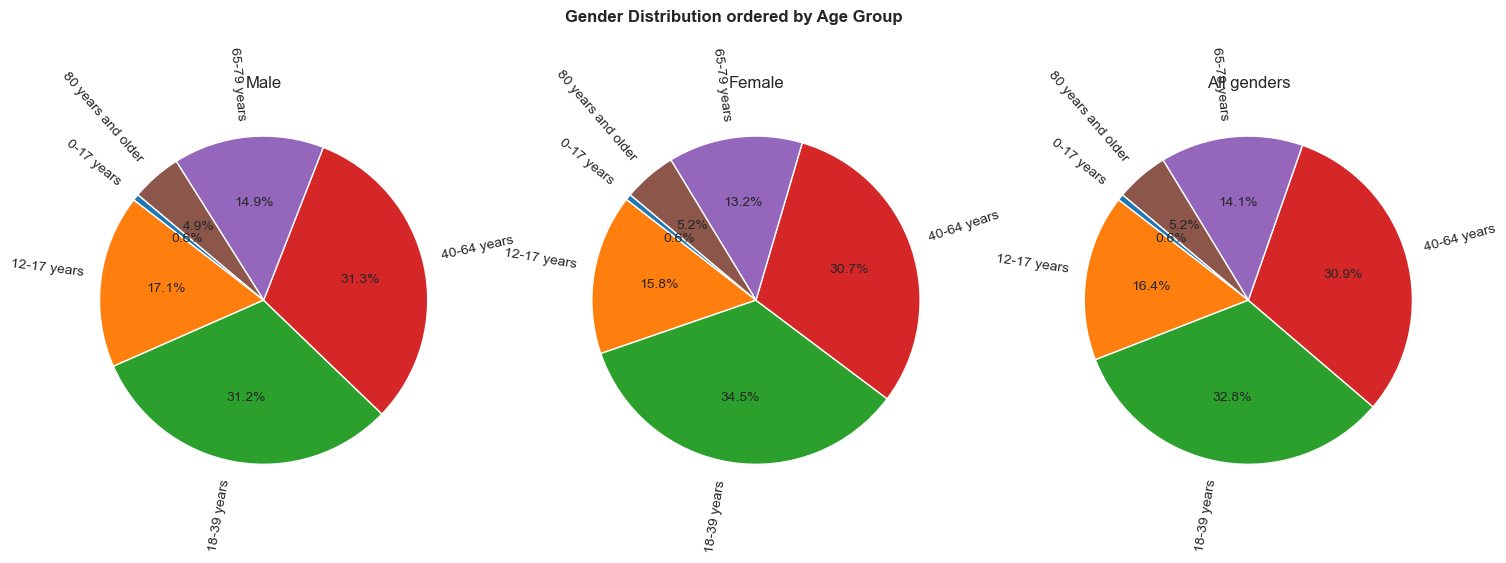

In [301]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle(f"Gender Distribution ordered by Age Group", fontweight='bold')
## Summary 

filtered_df = age_distribution_df[(age_distribution_df['gender'] == 'Male')]
age_distribution_df_summary = filtered_df.groupby('age_group')['% of Total Gender Distribution'].sum()
ax[0].pie(age_distribution_df_summary, labels=age_distribution_df_summary.index, autopct='%1.1f%%', startangle=140, rotatelabels=True)
ax[0].set_title('Male')

filtered_df = age_distribution_df[(age_distribution_df['gender'] == 'Female')]
age_distribution_df_summary = filtered_df.groupby('age_group')['% of Total Gender Distribution'].sum()
ax[1].pie(age_distribution_df_summary, labels=age_distribution_df_summary.index, autopct='%1.1f%%', startangle=140, rotatelabels=True)
ax[1].set_title('Female')

filtered_df = age_distribution_df[(age_distribution_df['gender'] == 'All genders')]
age_distribution_df_summary = filtered_df.groupby('age_group')['% of Total Gender Distribution'].sum()
ax[2].pie(age_distribution_df_summary, labels=age_distribution_df_summary.index, autopct='%1.1f%%', startangle=140, rotatelabels=True)
ax[2].set_title('All genders')

plt.show()

### Unique Questions

In [302]:
df["Question"].unique()

array(['Best-corrected visual acuity',
       'Percentage of people blind in both eyes',
       'Presenting visual acuity', 'Uncorrected Refractive Error (URE)'],
      dtype=object)

### Unique Answers to "Presenting visual acuity"

In [303]:
presenting_visual_acuity = df[df['Question'] == 'Presenting visual acuity']['Response'].unique()

### Unique Answers to "Best-corrected visual acuity"

In [304]:
best_corrected_visual_acuity = df[df['Question'] == 'Best-corrected visual acuity']['Response'].unique()

### Save Cleaned Data

In [305]:
df.to_csv(r'data/Vision_Survey_Cleaned.csv', header=True, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5017 entries, 1 to 10317
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Category            5017 non-null   object
 1   Question            5017 non-null   object
 2   Response            5017 non-null   object
 3   Age                 5017 non-null   object
 4   Gender              5017 non-null   object
 5   RaceEthnicity       5017 non-null   object
 6   RiskFactor          5017 non-null   object
 7   RiskFactorResponse  5017 non-null   object
 8   Sample_Size         5017 non-null   int32 
dtypes: int32(1), object(8)
memory usage: 372.4+ KB


### Data Visualization
* Age Distribution of People that smokes
* Age Distribution of People that have Diabetes
* Age Distribution of People that have Hypertension

## Distribution of People that smokes

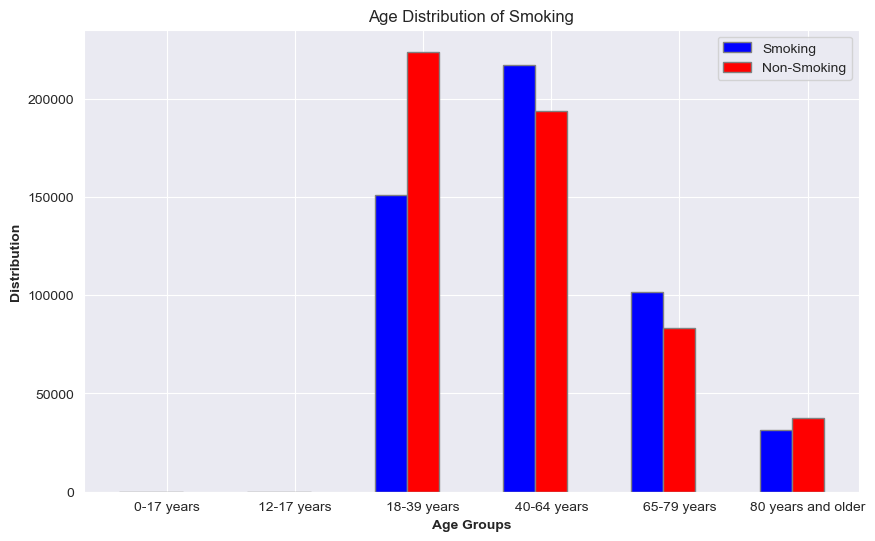

In [306]:
age_group_sample_size_smoking_yes = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups}
age_group_sample_size_smoking_no = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['RiskFactorResponse'] == 'No')]['Sample_Size'].sum() for age_group in age_groups}

bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, age_group_sample_size_smoking_yes.values(), color='blue', width=bar_width, edgecolor='grey', label='Smoking')
ax.bar(r2, age_group_sample_size_smoking_no.values(), color='red', width=bar_width, edgecolor='grey', label='Non-Smoking')

ax.set_xlabel('Age Groups', fontweight='bold')
ax.set_ylabel('Distribution', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(age_groups))])
ax.set_xticklabels(age_groups)
ax.set_title('Age Distribution of Smoking')
ax.legend()

plt.show()


Age Distribution of People that have Diabetes

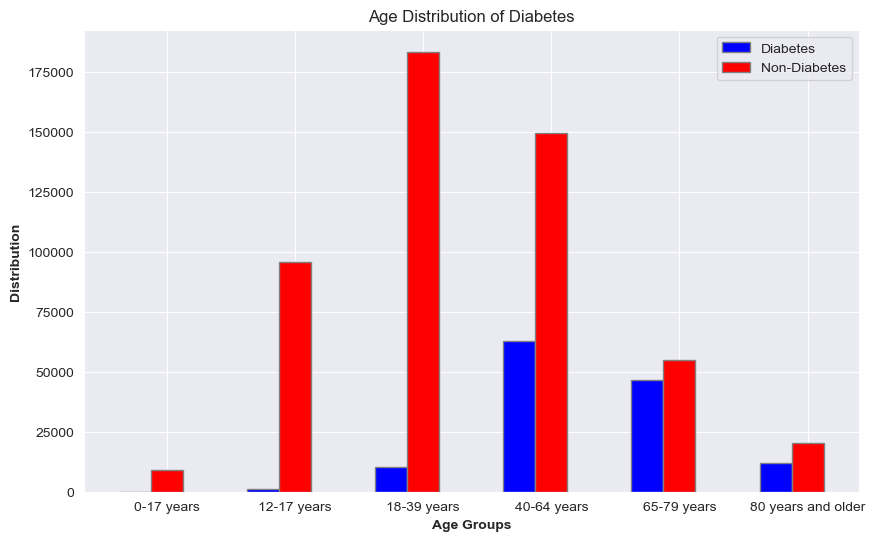

In [307]:
age_group_sample_size_diabetes_yes = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups}
age_group_sample_size_diabetes_no = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['RiskFactorResponse'] == 'No')]['Sample_Size'].sum() for age_group in age_groups}

bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, age_group_sample_size_diabetes_yes.values(), color='blue', width=bar_width, edgecolor='grey', label='Diabetes')
ax.bar(r2, age_group_sample_size_diabetes_no.values(), color='red', width=bar_width, edgecolor='grey', label='Non-Diabetes')

ax.set_xlabel('Age Groups', fontweight='bold')
ax.set_ylabel('Distribution', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(age_groups))])
ax.set_xticklabels(age_groups)
ax.set_title('Age Distribution of Diabetes')
ax.legend()

plt.show()

### Age Distribution of People that have Hypertension

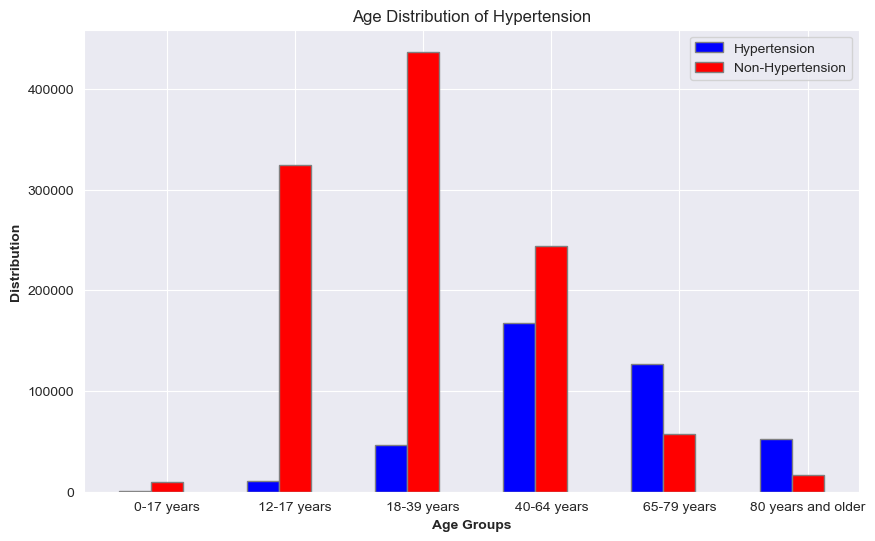

In [308]:
age_group_sample_size_hypertension_yes = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups}
age_group_sample_size_hypertension_no = {age_group: df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['RiskFactorResponse'] == 'No')]['Sample_Size'].sum() for age_group in age_groups}

bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(r1, age_group_sample_size_hypertension_yes.values(), color='blue', width=bar_width, edgecolor='grey', label='Hypertension')
ax.bar(r2, age_group_sample_size_hypertension_no.values(), color='red', width=bar_width, edgecolor='grey', label='Non-Hypertension')

ax.set_xlabel('Age Groups', fontweight='bold')
ax.set_ylabel('Distribution', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(age_groups))])
ax.set_xticklabels(age_groups)
ax.set_title('Age Distribution of Hypertension')
ax.legend()

plt.show()

### Percentage of Males that smokes, have Diabetes and have Hypertension


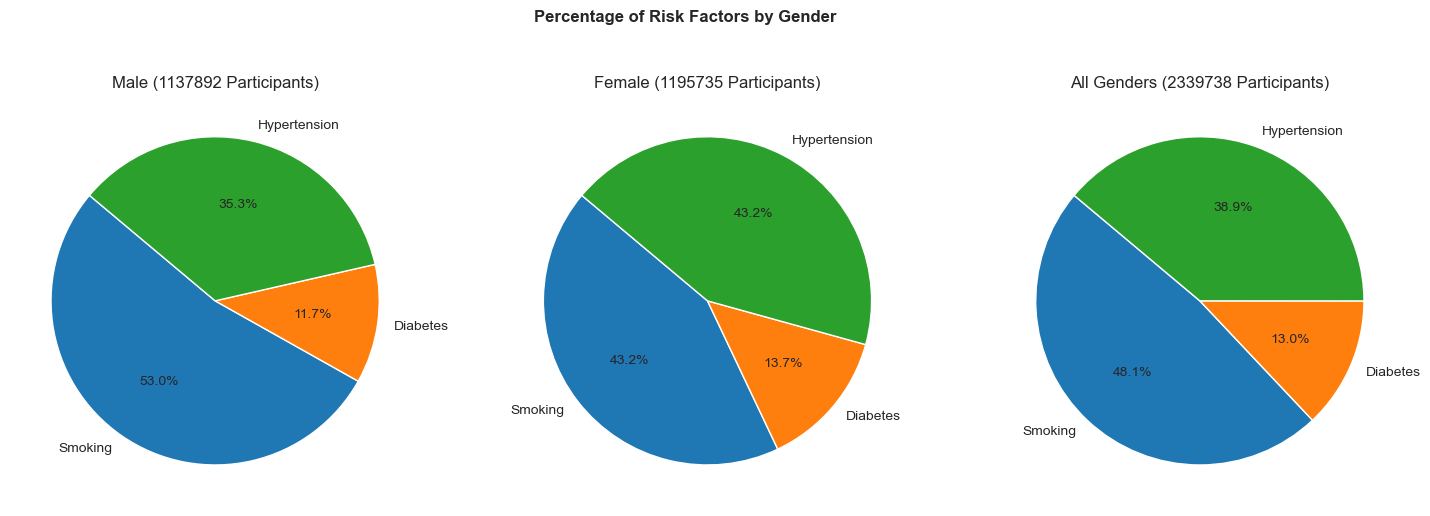

In [309]:
# Dictionary to store data for pie charts
risk_counts_by_gender = {gender: {risk: 0 for risk in risk_factors} for gender in genders}
total_sample_size_by_gender = {gender: df[df['Gender'] == gender]['Sample_Size'].sum() for gender in genders}

# Calculate counts for each risk factor for each gender
for gender in genders:
    for risk in risk_factors:
        risk_counts_by_gender[gender][risk] = df[(df['Gender'] == gender) & (df['RiskFactor'] == risk) & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum()

# Calculate percentages for each risk factor for each gender
percentages_by_gender = {gender: {risk: (risk_counts_by_gender[gender][risk] / total_sample_size_by_gender[gender]) * 100 for risk in risk_factors} for gender in genders}

# Create pie charts for each gender
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Percentage of Risk Factors by Gender', fontweight='bold')

# Male
axes[0].pie(percentages_by_gender['Male'].values(), labels=percentages_by_gender['Male'].keys(), autopct='%1.1f%%', startangle=140)
axes[0].set_title(f"Male ({total_sample_size_by_gender['Male']} Participants)")

# Female
axes[1].pie(percentages_by_gender['Female'].values(), labels=percentages_by_gender['Female'].keys(), autopct='%1.1f%%', startangle=140)
axes[1].set_title(f"Female ({total_sample_size_by_gender['Female']} Participants)")

# All genders
axes[2].pie(percentages_by_gender['All genders'].values(), labels=percentages_by_gender['All genders'].keys(), autopct='%1.1f%%', startangle=140)
axes[2].set_title(f"All Genders ({total_sample_size_by_gender['All genders']} Participants)")

plt.show()

### Merged Data Visualization from above

* How many smokers have Diabetes and Hypertension
* How many people with Diabetes have Hypertension
* How many have Diabetes and Hypertension



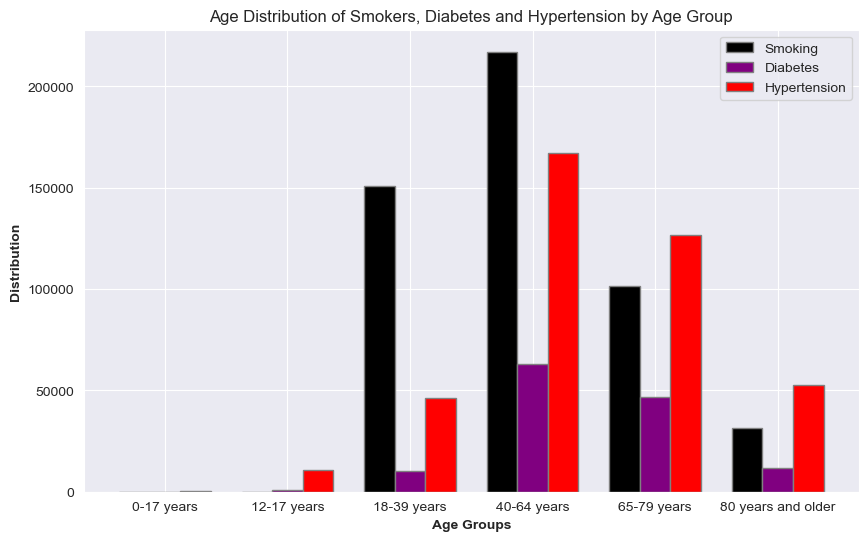

In [310]:
# Count of each Risk Factor based on Age Group
smoking_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups]
diabetes_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups]
hypertension_counts = [df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum() for age_group in age_groups]

# Plotting the Bar Graph Calculate the width of the bars and the spacing between them
bar_width = 0.25
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Set the bars next to each other
plt.figure(figsize=(10, 6))
plt.bar(r1, smoking_counts, color='black', width=bar_width, edgecolor='grey', label='Smoking')
plt.bar(r2, diabetes_counts, color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
plt.bar(r3, hypertension_counts, color='red', width=bar_width, edgecolor='grey', label='Hypertension')

# Adding Labels and Title
plt.xlabel('Age Groups', fontweight='bold')
plt.ylabel('Distribution', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(age_groups))], age_groups)
plt.title('Age Distribution of Smokers, Diabetes and Hypertension by Age Group')

plt.legend()
plt.show()

### Testing

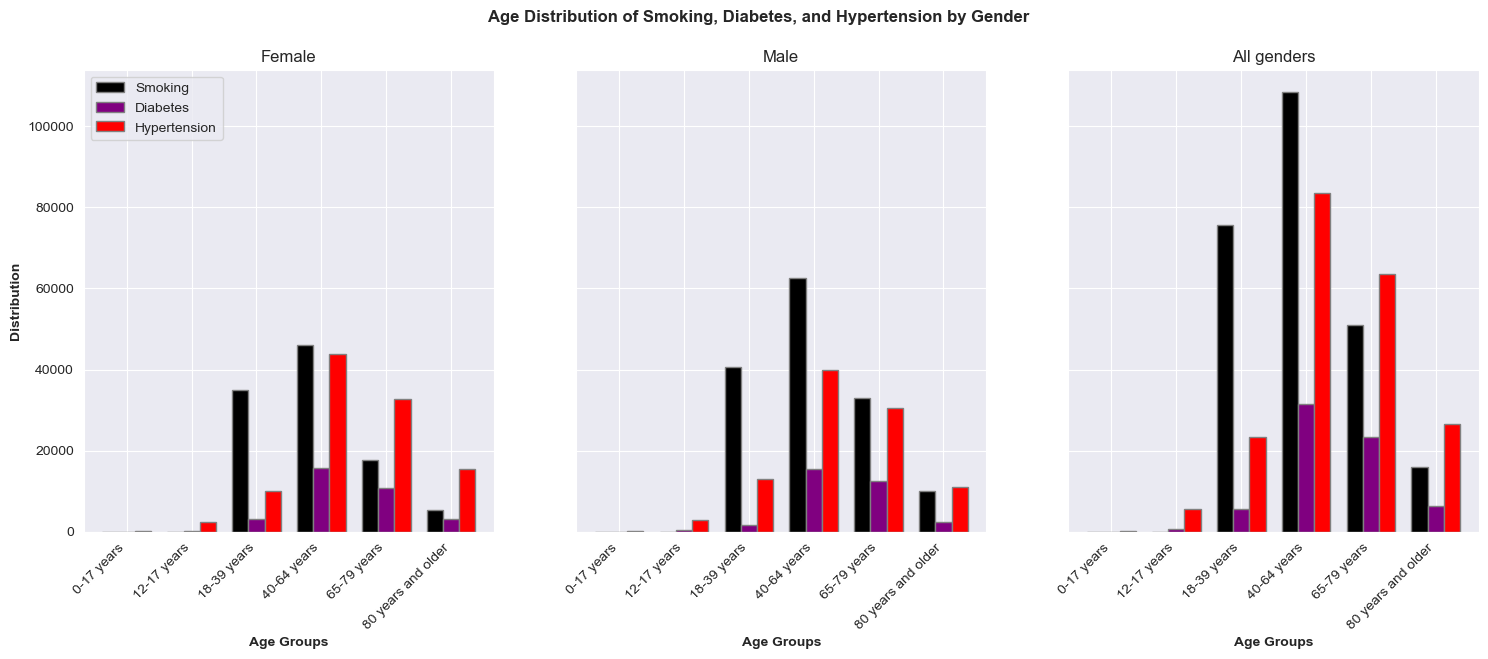

In [311]:
# Dictionary to store data for subplots
risk_counts_by_gender = {gender: {'Smoking': [], 'Diabetes': [], 'Hypertension': []} for gender in genders}

# Get Bar height for each Age Group based on the gender
for gender in genders:
    for age_group in age_groups:
        smoking_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Smoking') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum()
        diabetes_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Diabetes') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum()
        hypertension_count = df[(df['Age'] == age_group) & (df['RiskFactor'] == 'Hypertension') & (df['Gender'] == gender) & (df['RiskFactorResponse'] == 'Yes')]['Sample_Size'].sum()
        
        risk_counts_by_gender[gender]['Smoking'].append(smoking_count)
        risk_counts_by_gender[gender]['Diabetes'].append(diabetes_count)
        risk_counts_by_gender[gender]['Hypertension'].append(hypertension_count)

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Age Distribution of Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r1 = np.arange(len(age_groups))
    r2 = [x + bar_width for x in r1]
    r3 = [x + bar_width for x in r2]
    
    axes[idx].bar(r1, risk_counts_by_gender[gender]['Smoking'], color='black', width=bar_width, edgecolor='grey', label='Smoking')
    axes[idx].bar(r2, risk_counts_by_gender[gender]['Diabetes'], color='purple', width=bar_width, edgecolor='grey', label='Diabetes')
    axes[idx].bar(r3, risk_counts_by_gender[gender]['Hypertension'], color='red', width=bar_width, edgecolor='grey', label='Hypertension')
    
    axes[idx].set_xlabel('Age Groups', fontweight='bold')
    axes[idx].set_xticks([r + bar_width for r in range(len(age_groups))])
    axes[idx].set_xticklabels(age_groups, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')
    
axes[0].set_ylabel('Distribution', fontweight='bold')
axes[0].legend(loc='upper left')

plt.show()

### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Presenting visual acuity"

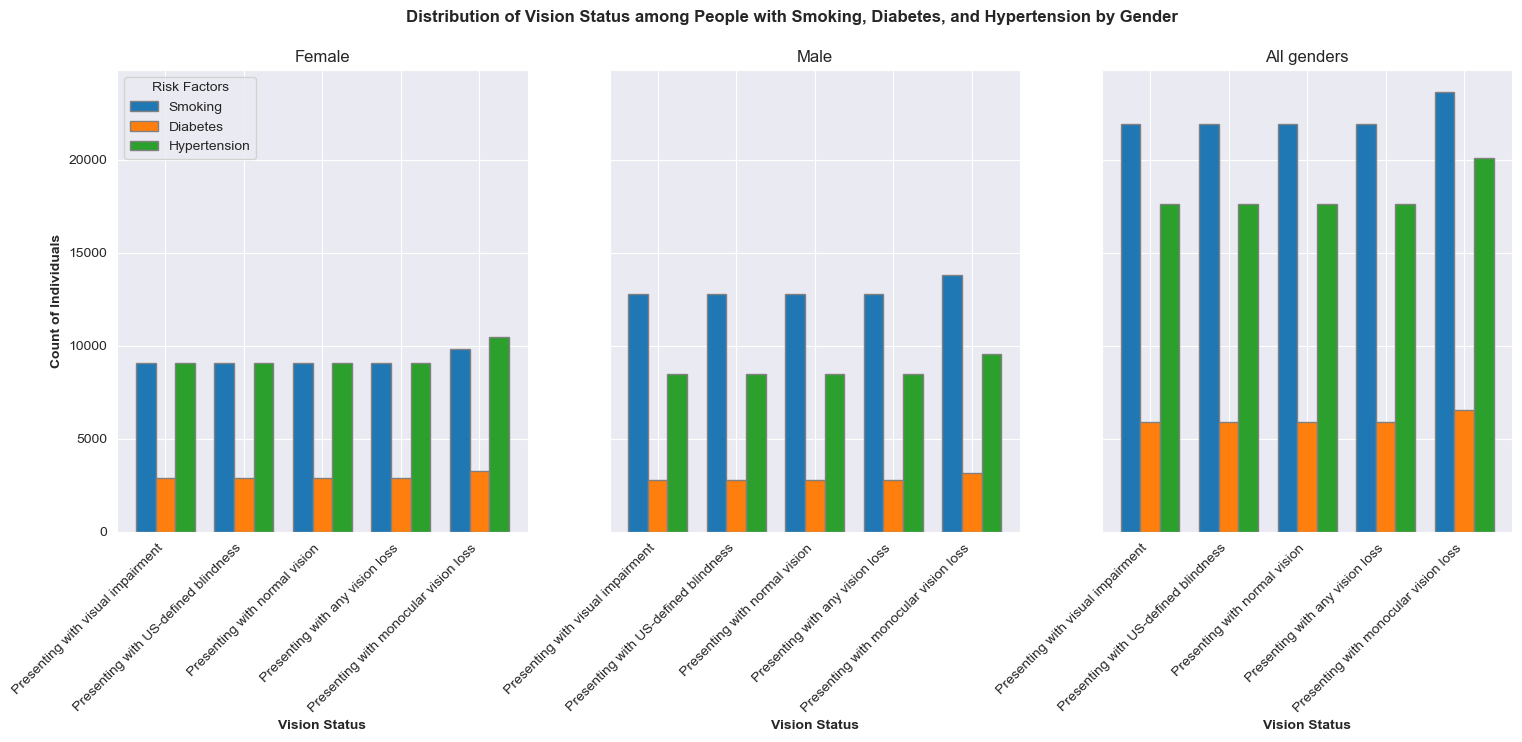

In [312]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in presenting_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in presenting_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Presenting visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ]['Sample_Size'].sum()
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(presenting_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in presenting_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(presenting_visual_acuity))])
    axes[idx].set_xticklabels(presenting_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()

In [313]:
df[(df['Gender'] == 'Male') &
   (df['RiskFactor'] == 'Smoking') &
   (df['Category'] == 'Measured Visual Acuity') &
   (df['RiskFactorResponse'] == 'Yes')]

,Category,Question,Response,Age,Gender,RaceEthnicity,RiskFactor,RiskFactorResponse,Sample_Size
55,Measured Visual Acuity,Presenting visual acuity,Presenting with normal vision,40-64 years,Male,Other,Smoking,Yes,92
61,Measured Visual Acuity,Uncorrected Refractive Error (URE),Uncorrected refractive error (URE),18-39 years,Male,All races,Smoking,Yes,1722
66,Measured Visual Acuity,Presenting visual acuity,Presenting with visual impairment,80 years and older,Male,"Hispanic, any race",Smoking,Yes,50
94,Measured Visual Acuity,Presenting visual acuity,Presenting with monocular vision loss,40-64 years,Male,"Hispanic, any race",Smoking,Yes,748
106,Measured Visual Acuity,Presenting visual acuity,Presenting with any vision loss,18-39 years,Male,"Hispanic, any race",Smoking,Yes,527
...,...,...,...,...,...,...,...,...,...
10105,Measured Visual Acuity,Presenting visual acuity,Presenting with any vision loss,40-64 years,Male,"Hispanic, any race",Smoking,Yes,694
10137,Measured Visual Acuity,Best-corrected visual acuity,Visual impairment,40-64 years,Male,All races,Smoking,Yes,2680
10162,Measured Visual Acuity,Uncorrected Refractive Error (URE),Uncorrected refractive error (URE),18-39 years,Male,Other,Smoking,Yes,80
10223,Measured Visual Acuity,Presenting visual acuity,Presenting with US-defined blindness,18-39 years,Male,"White, non-Hispanic",Smoking,Yes,863


### Distribution of the Vision Status of People that Smokes, have Diabetes and have Hypertension based on Gender based on the question "Best-corrected visual acuity"

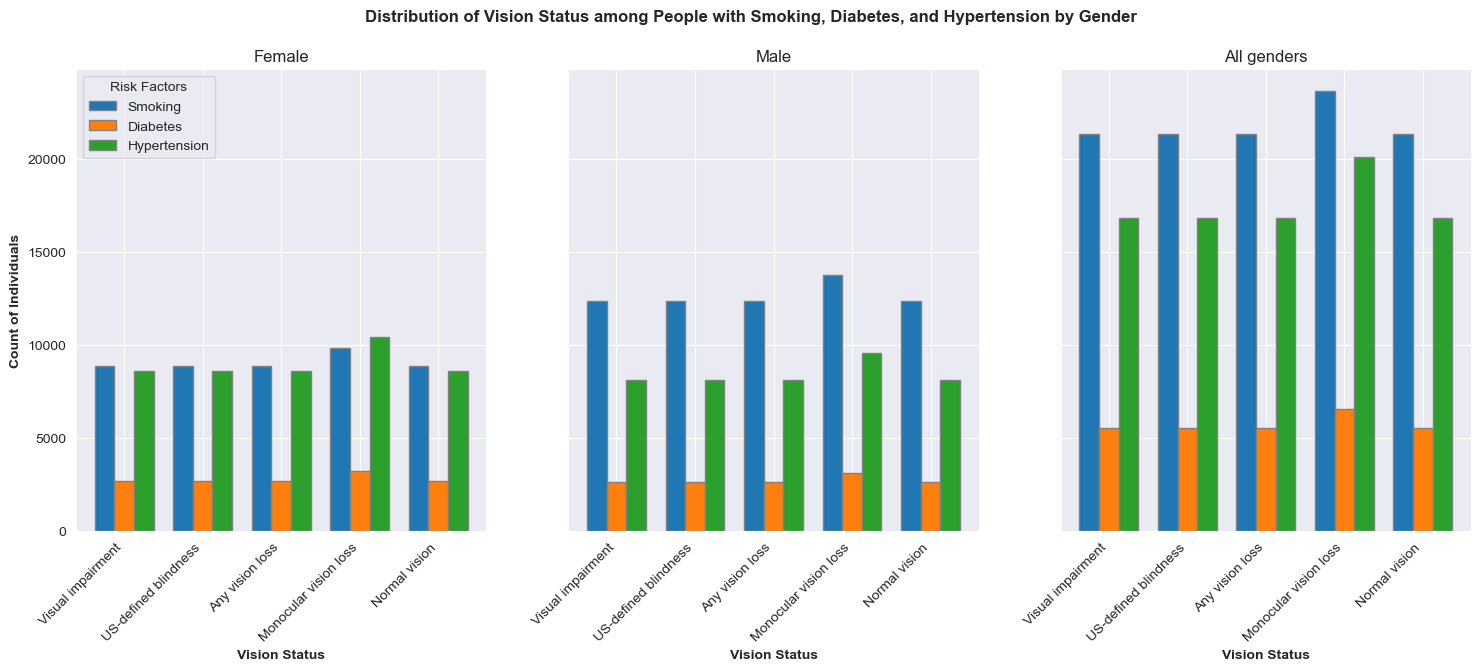

In [314]:
vision_risk_counts_by_gender = {gender: {risk: {status: 0 for status in best_corrected_visual_acuity} for risk in risk_factors} for gender in genders}

for gender in genders:
    for risk in risk_factors:
        for status in best_corrected_visual_acuity:
            count = df[
                (df['Gender'] == gender) &
                (df['RiskFactor'] == risk) &
                (df['Question'] == 'Best-corrected visual acuity') &
                (df['Response'] == status) & 
                (df['RiskFactorResponse'] == 'Yes')
            ]['Sample_Size'].sum()
            vision_risk_counts_by_gender[gender][risk][status] = count

fig, axes = plt.subplots(nrows=1, ncols=len(genders), figsize=(18, 6), sharey=True)
fig.suptitle('Distribution of Vision Status among People with Smoking, Diabetes, and Hypertension by Gender', fontweight='bold')

for idx, gender in enumerate(genders):
    r = [np.arange(len(best_corrected_visual_acuity)) + bar_width * i for i in range(len(risk_factors))]
    for i, risk in enumerate(risk_factors):
        axes[idx].bar(r[i], [vision_risk_counts_by_gender[gender][risk][status] for status in best_corrected_visual_acuity], 
                      width=bar_width, edgecolor='grey', label=risk)
    
    axes[idx].set_xlabel('Vision Status', fontweight='bold')
    axes[idx].set_xticks([pos + bar_width for pos in range(len(best_corrected_visual_acuity))])
    axes[idx].set_xticklabels(best_corrected_visual_acuity, rotation=45, ha='right')
    axes[idx].set_title(f'{gender}')

axes[0].set_ylabel('Count of Individuals', fontweight='bold')
axes[0].legend(loc='upper left', title='Risk Factors')

plt.show()